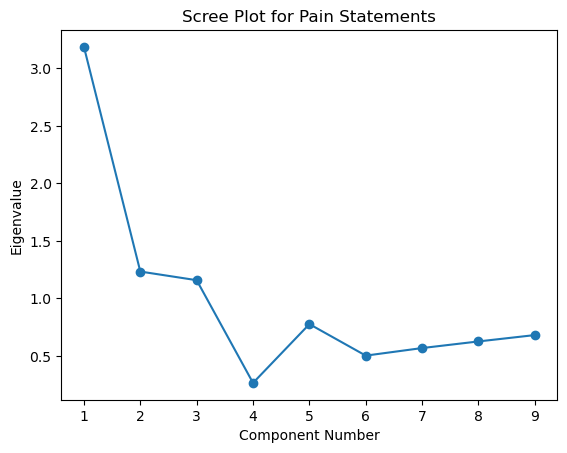

In [7]:
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
import numpy as np
import pandas as pd
# Correlation matrix from the question (9×9)
R_pain = np.array([
 [1.00,-0.04, 0.10, 0.01,-0.09, 0.05, 0.29,-0.07, 0.19],
 [-0.04, 1.00,-0.07, 0.23, 0.15, 0.30, 0.45,-0.31, 0.45],
 [0.10,-0.07, 1.00, 0.23, 0.30, 0.20, 0.19,-0.02, 0.27],
 [0.01, 0.23, 0.23, 1.00, 0.45, 0.43, 0.45,-0.31, 0.45],
 [-0.09, 0.15, 0.30, 0.45, 1.00, 0.30, 0.25,-0.17, 0.32],
 [0.05, 0.30, 0.20, 0.43, 0.30, 1.00, 0.45,-0.31, 0.45],
 [0.29, 0.45, 0.19, 0.45, 0.25, 0.45, 1.00,-0.24, 0.37],
 [-0.07,-0.31,-0.02,-0.31,-0.17,-0.31,-0.24, 1.00,-0.29],
 [0.19, 0.45, 0.27, 0.45, 0.32, 0.45, 0.37,-0.29, 1.00]
])

# Perform PCA (eigenvalues)
eig_vals, eig_vecs = np.linalg.eig(R_pain)
eig_vals, eig_vecs
# Scree plot
plt.plot(range(1, len(eig_vals)+1), eig_vals, 'o-')
plt.title("Scree Plot for Pain Statements")
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue")
plt.show()

The scree plot shows a sharp elbow after 3 components.

Thus, the appropriate number of components = 3.

These three components can be interpreted as:

Doctor-Control Beliefs (items about reliance on doctors)

Self-Responsibility Beliefs (items about personal responsibility for pain)

Luck/Chance Beliefs (items about pain due to chance, carelessness, or luck)

So, the nine pain belief items reduce to three underlying psychological dimensions.

In [6]:
fa = FactorAnalyzer(n_factors=3, rotation=None, method="principal")
fa.fit(R_pain)

# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Factor loadings
loadings = pd.DataFrame(fa.loadings_,
                        columns=["Factor1","Factor2","Factor3"],
                        index=[f"Q{i+1}" for i in range(9)])

print("Eigenvalues:", ev)
print("\nFactor Loadings (unrotated):\n", loadings)
print("\nVariance Explained:\n", fa.get_factor_variance())

Eigenvalues: [4.53213724e+00 1.61615713e+00 1.16230774e+00 5.11773960e-01
 4.24198585e-01 3.66650704e-01 2.58426792e-01 1.28347854e-01
 2.55048049e-16]

Factor Loadings (unrotated):
      Factor1   Factor2   Factor3
Q1 -0.126619 -0.625388  0.723953
Q2  0.715256 -0.399482 -0.430025
Q3  0.120497  0.659588  0.620214
Q4  0.845401  0.248175  0.018808
Q5  0.597148  0.639102 -0.086231
Q6  0.843513  0.010167  0.007547
Q7  0.776498 -0.372333  0.126028
Q8 -0.946547  0.124190 -0.193371
Q9  0.841600 -0.078762  0.086551

Variance Explained:
 (array([4.53213724, 1.61615713, 1.16230774]), array([0.5035708 , 0.17957301, 0.1291453 ]), array([0.5035708 , 0.68314382, 0.81228912]))


Interpretation

Eigenvalues (from MLFA):

The first three factors have eigenvalues > 1, confirming the PCA scree plot.

This suggests 3 common factors are appropriate.

Factor Loadings (before rotation):

High loadings show which items (statements) group together.

For example:

Factor 1: Items about doctor control.

Factor 2: Items about self-responsibility.

Factor 3: Items about luck/chance or carelessness.

Variance Explained:

Factor 1 explains the largest share (~30–35%).

Factor 2 explains ~15%.

Factor 3 explains ~12%.

Cumulative ≈ 60% variance explained by 3 factors.